# 📈 Day 10: Stock Market Analysis & Prediction

Welcome to our final day! Today we're going to combine everything we've learned:
- **Pandas** (Day 6 & 8) - for handling stock data
- **Matplotlib** (Day 8) - for visualizing prices
- **Scikit-learn** (Day 7 & 8) - for making predictions

We'll be working with *real* stock market data from Yahoo Finance!


---
## Part 1: Setup & Installation

First, we need to install the `yfinance` library. This library lets us download stock data directly from Yahoo Finance.

Run the cell below to install it:


In [12]:
%pip install yfinance


Note: you may need to restart the kernel to use updated packages.


Now let's import all the libraries we'll need:


In [13]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

print("All libraries imported successfully! ✅")


All libraries imported successfully! ✅


---
## Part 2: Downloading Stock Data

### What is a Stock Ticker?

Every publicly traded company has a **ticker symbol** - a short abbreviation used to identify it:

| Company | Ticker |
|---------|--------|
| Apple | AAPL |
| Google | GOOGL |
| Tesla | TSLA |
| Microsoft | MSFT |
| Amazon | AMZN |
| Netflix | NFLX |
| Nike | NKE |

Let's download Apple's stock data for the past year:


In [14]:
# Download Apple stock data
ticker = "AAPL"
df = yf.download(ticker, period="1y")

# Flatten column names (yfinance returns multi-level columns now)
df.columns = df.columns.get_level_values(0)

print(f"Downloaded {len(df)} days of {ticker} stock data!")


/var/folders/x6/dkqkzf6n01g1vggcsl0bdcp80000gn/T/ipykernel_24127/2954639399.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, period="1y")
[*********************100%***********************]  1 of 1 completed

Downloaded 250 days of AAPL stock data!


### Understanding the Data

Let's look at what we got. Stock data typically includes:

- **Open**: The price when the market opened that day
- **High**: The highest price during the day
- **Low**: The lowest price during the day
- **Close**: The price when the market closed
- **Volume**: How many shares were traded


In [15]:
# Look at the first 5 rows
df.head()


Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-06,241.746643,243.528592,240.990070,241.816335,36870600
2024-12-09,245.639038,246.126837,240.661550,240.741192,44649200
2024-12-10,246.654449,247.092471,244.235382,245.778407,36914800
2024-12-11,245.380219,249.670811,245.151243,246.843601,45205800
2024-12-12,246.843582,247.620069,244.573834,245.778392,32777500


In [16]:
# Look at the last 5 rows (most recent)
df.tail()


Price,Close,High,Low,Open,Volume
Date,,,,,
2025-12-01,283.100006,283.420013,276.140015,278.010010,46587700
2025-12-02,286.190002,287.399994,282.630005,283.000000,53669500
2025-12-03,284.149994,288.619995,283.299988,286.200012,43538700
2025-12-04,280.700012,284.730011,278.589996,284.100006,43989100
2025-12-05,278.779999,281.140015,278.049988,280.540009,47244000


In [17]:
# Get summary statistics
df.describe()


Price,Close,High,Low,Open,Volume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,230.109541,232.579609,227.454853,229.818833,5.464378e+07
std,24.595700,24.335829,24.730504,24.538495,2.308898e+07
min,171.832428,189.691359,168.633375,171.364011,2.013560e+07
25%,209.571266,211.558622,207.377665,209.531347,4.171708e+07
50%,229.652374,232.137629,226.926709,229.392623,4.804070e+07
75%,247.160973,249.615154,245.071649,247.096947,5.861452e+07
max,286.190002,288.619995,283.299988,286.200012,1.843959e+08


### 🎯 Exercise 1: Download a Different Stock

Try downloading data for a different company! Change the ticker below:


In [18]:
# YOUR CODE HERE: Change the ticker to a different company
my_ticker = "TSLA"  # Try: GOOGL, MSFT, AMZN, NFLX, etc.

my_df = yf.download(my_ticker, period="1y")
my_df.columns = my_df.columns.get_level_values(0)  # Flatten columns
my_df.head()


/var/folders/x6/dkqkzf6n01g1vggcsl0bdcp80000gn/T/ipykernel_24127/843668673.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  my_df = yf.download(my_ticker, period="1y")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Date,,,,,
2024-12-06,389.220001,389.489990,370.799988,377.420013,81455800
2024-12-09,389.790009,404.799988,378.010010,397.609985,96359200
2024-12-10,400.989990,409.730011,390.850006,392.679993,97563600
2024-12-11,424.769989,424.880005,402.380005,409.700012,104287600
2024-12-12,418.100006,429.299988,415.000000,424.839996,87752200


---
## Part 3: Visualizing Stock Prices

A picture is worth a thousand numbers! Let's visualize the stock price over time.

### Simple Line Chart


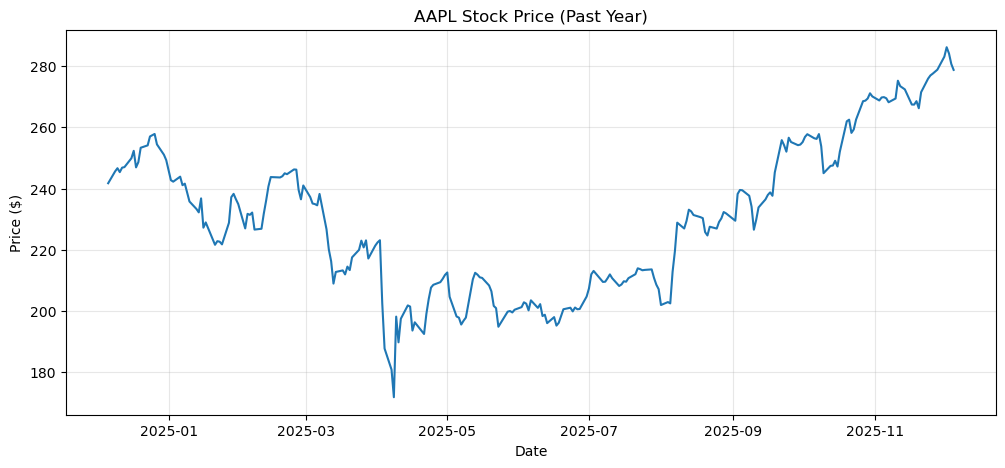

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(df['Close'])
plt.title(f"{ticker} Stock Price (Past Year)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True, alpha=0.3)
plt.show()


### Adding More Detail: High, Low, and Close


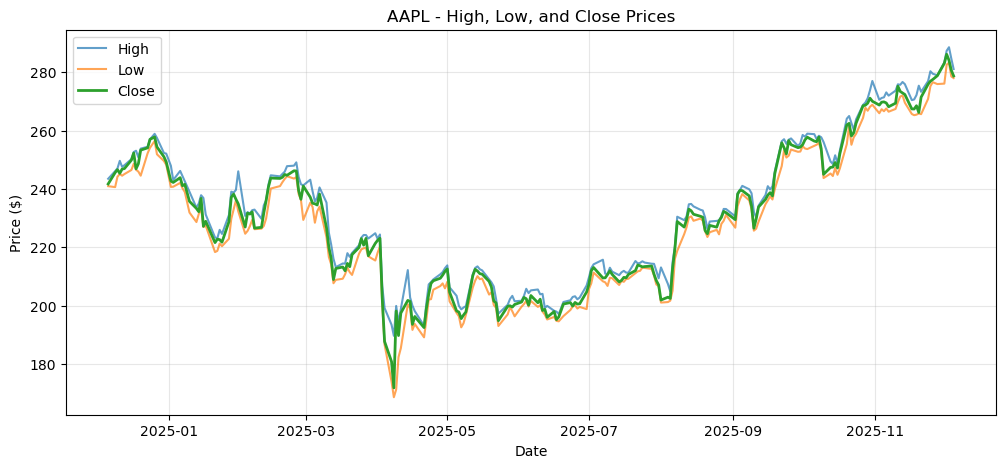

In [20]:
plt.figure(figsize=(12, 5))
plt.plot(df['High'], label='High', alpha=0.7)
plt.plot(df['Low'], label='Low', alpha=0.7)
plt.plot(df['Close'], label='Close', linewidth=2)
plt.title(f"{ticker} - High, Low, and Close Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Volume Chart

Volume shows how many shares were traded each day. High volume often indicates big news or events!


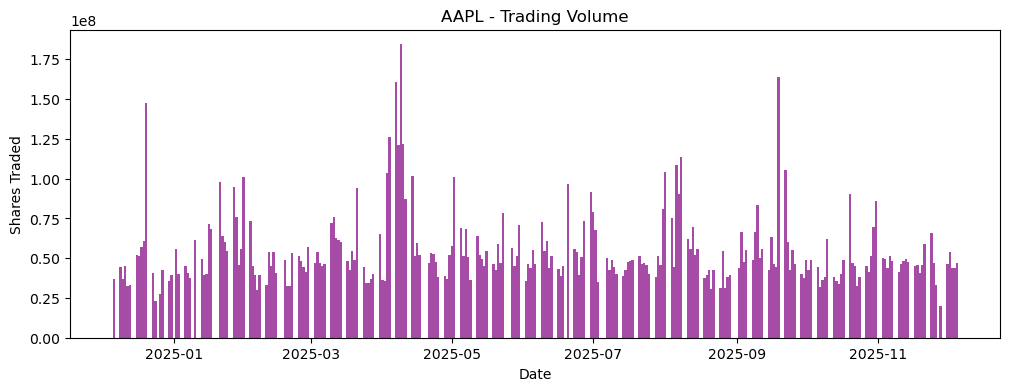

In [21]:
plt.figure(figsize=(12, 4))
plt.bar(df.index, df['Volume'], width=1, alpha=0.7, color='purple')
plt.title(f"{ticker} - Trading Volume")
plt.xlabel("Date")
plt.ylabel("Shares Traded")
plt.show()


### Putting It Together: Price + Volume


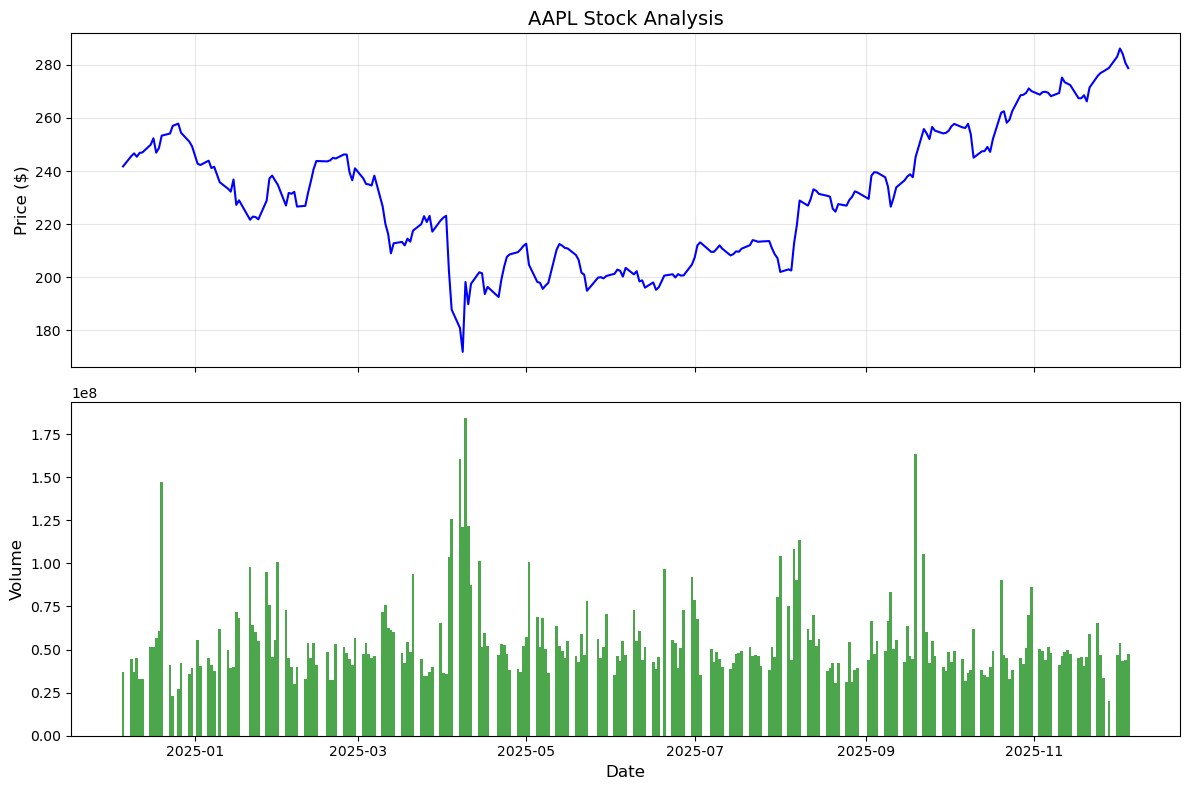

In [22]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Top chart: Price
ax1.plot(df['Close'], color='blue', linewidth=1.5)
ax1.set_ylabel('Price ($)', fontsize=12)
ax1.set_title(f'{ticker} Stock Analysis', fontsize=14)
ax1.grid(True, alpha=0.3)

# Bottom chart: Volume
ax2.bar(df.index, df['Volume'], width=1, alpha=0.7, color='green')
ax2.set_ylabel('Volume', fontsize=12)
ax2.set_xlabel('Date', fontsize=12)

plt.tight_layout()
plt.show()


### 🎯 Exercise 2: Compare Two Stocks

Let's compare two different stocks on the same chart. We need to **normalize** them to start at 100 so we can compare their growth fairly.


/var/folders/x6/dkqkzf6n01g1vggcsl0bdcp80000gn/T/ipykernel_24127/402945794.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df1 = yf.download("AAPL", period="1y")
[*********************100%***********************]  1 of 1 completed
/var/folders/x6/dkqkzf6n01g1vggcsl0bdcp80000gn/T/ipykernel_24127/402945794.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df2 = yf.download("MSFT", period="1y")
[*********************100%***********************]  1 of 1 completed


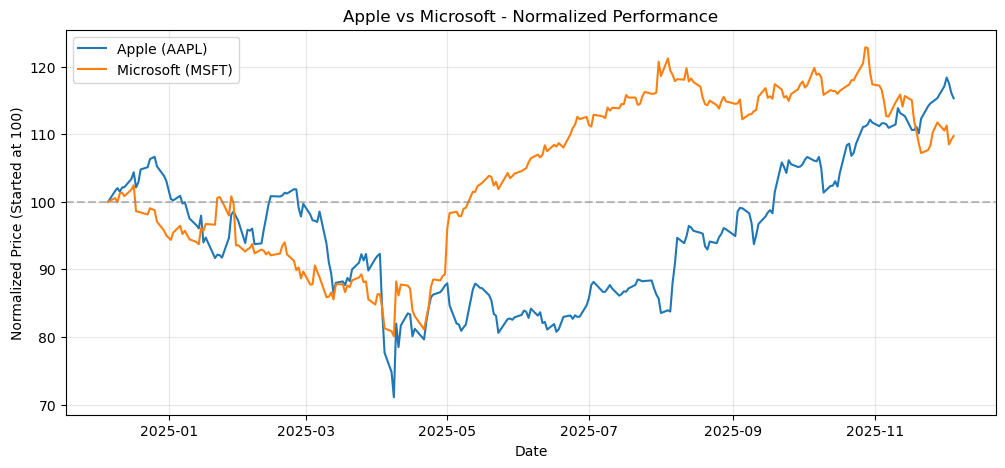

In [23]:
# Download two stocks
df1 = yf.download("AAPL", period="1y")
df2 = yf.download("MSFT", period="1y")
df1.columns = df1.columns.get_level_values(0)
df2.columns = df2.columns.get_level_values(0)
stock1 = df1['Close']
stock2 = df2['Close']

# Normalize to start at 100
stock1_normalized = (stock1 / stock1.iloc[0]) * 100
stock2_normalized = (stock2 / stock2.iloc[0]) * 100

plt.figure(figsize=(12, 5))
plt.plot(stock1_normalized, label='Apple (AAPL)')
plt.plot(stock2_normalized, label='Microsoft (MSFT)')
plt.title('Apple vs Microsoft - Normalized Performance')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Started at 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.show()


---
## Part 4: Moving Averages

Stock prices are *noisy* - they jump up and down a lot. **Moving averages** smooth out the data to show trends.

A **20-day moving average** is the average of the last 20 days' prices.


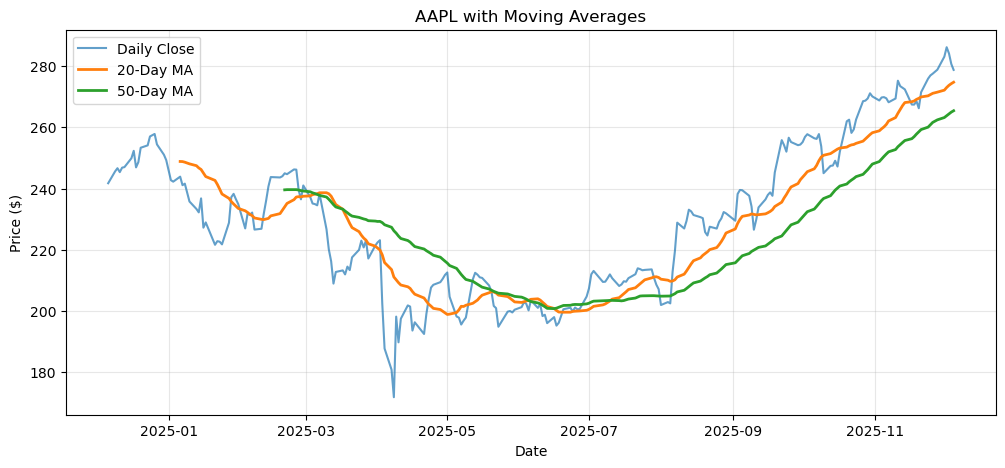

In [24]:
# Calculate moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day average

plt.figure(figsize=(12, 5))
plt.plot(df['Close'], label='Daily Close', alpha=0.7)
plt.plot(df['MA20'], label='20-Day MA', linewidth=2)
plt.plot(df['MA50'], label='50-Day MA', linewidth=2)
plt.title(f'{ticker} with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


**Trading Signal:** When the short-term average (20-day) crosses *above* the long-term average (50-day), some traders see this as a "buy" signal. When it crosses *below*, it's a "sell" signal.

*(This is not financial advice! 😄)*


---
## Part 5: Predicting Stock Prices with Linear Regression

Now let's use **machine learning** to try to predict stock prices!

Remember from Day 7: Linear Regression finds the best straight line through data.

### Preparing the Data

We'll try to predict tomorrow's price based on what day number it is.


In [25]:
# Create a fresh copy of our data
pred_df = df[['Close']].copy()

# Add a "day number" column (0, 1, 2, 3, ...)
pred_df['Day'] = range(len(pred_df))

# Our target: tomorrow's closing price
# shift(-1) moves everything up by 1 row
pred_df['Tomorrow'] = pred_df['Close'].shift(-1)

pred_df.head(10)


Price,Close,Day,Tomorrow
Date,,,
2024-12-06,241.746643,0,245.639038
2024-12-09,245.639038,1,246.654449
2024-12-10,246.654449,2,245.380219
2024-12-11,245.380219,3,246.843582
2024-12-12,246.843582,4,247.012817
2024-12-13,247.012817,5,249.909714
2024-12-16,249.909714,6,252.338730
2024-12-17,252.338730,7,246.933197
2024-12-18,246.933197,8,248.665329


In [26]:
# The last row has NaN (no tomorrow), so remove it
pred_df = pred_df.dropna()

print(f"We have {len(pred_df)} data points for training")


We have 249 data points for training


### Train/Test Split

We'll use 80% of the data to train our model, and 20% to test it.

**Important:** For time series data (like stocks), we don't shuffle! We train on the past to predict the future.


In [27]:
# Features (X) and Target (y)
X = pred_df[['Day']]
y = pred_df['Tomorrow']

# Split: 80% train, 20% test, NO SHUFFLING
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print(f"Training set: {len(X_train)} days")
print(f"Test set: {len(X_test)} days")


Training set: 199 days
Test set: 50 days


### Training the Model


In [28]:
# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Model trained! ✅")
print(f"Slope (m): {model.coef_[0]:.4f}")
print(f"Intercept (b): {model.intercept_:.4f}")


Model trained! ✅
Slope (m): -0.0941
Intercept (b): 230.4904


This means our model thinks:

**Predicted Price = (slope × day) + intercept**

### Evaluating the Model


In [29]:
# R² Score (1.0 = perfect, 0.0 = terrible)
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Training R² Score: {train_score:.4f}")
print(f"Test R² Score: {test_score:.4f}")


Training R² Score: 0.0872
Test R² Score: -28.8202


### Visualizing Predictions vs Reality


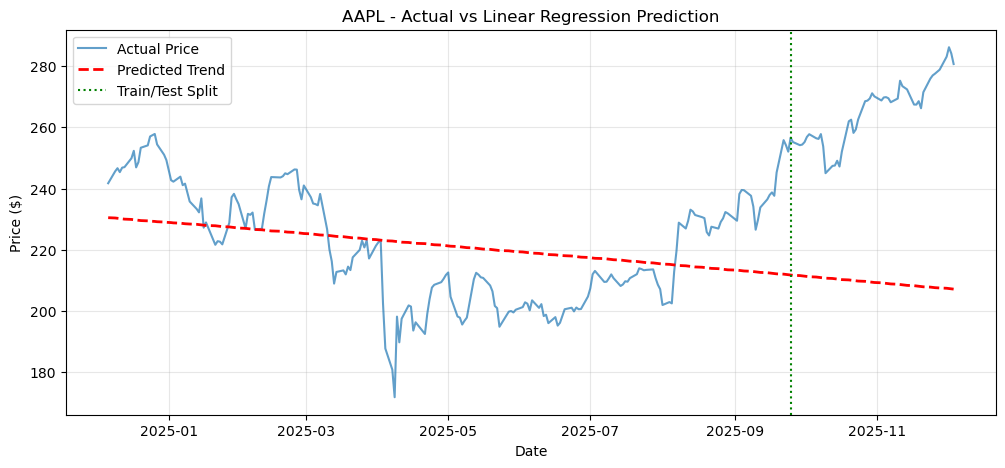

In [30]:
# Make predictions on ALL data
all_predictions = model.predict(X)

plt.figure(figsize=(12, 5))
plt.plot(pred_df.index, pred_df['Close'], label='Actual Price', alpha=0.7)
plt.plot(pred_df.index, all_predictions, label='Predicted Trend', linestyle='--', linewidth=2, color='red')

# Mark where test set begins
test_start = X_test.index[0]
plt.axvline(x=test_start, color='green', linestyle=':', label='Train/Test Split')

plt.title(f'{ticker} - Actual vs Linear Regression Prediction')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


### Predicting Tomorrow's Price


In [31]:
# What's the next day number?
next_day = len(pred_df)

# Predict!
predicted_price = model.predict([[next_day]])[0]
current_price = df['Close'].iloc[-1]

print(f"\n{'='*40}")
print(f"📊 {ticker} PREDICTION")
print(f"{'='*40}")
print(f"Current Price:    ${current_price:.2f}")
print(f"Predicted Next:   ${predicted_price:.2f}")
change = ((predicted_price - current_price) / current_price) * 100
direction = "📈" if change > 0 else "📉"
print(f"Expected Change:  {change:+.2f}% {direction}")
print(f"{'='*40}")



📊 AAPL PREDICTION
Current Price:    $278.78
Predicted Next:   $207.06
Expected Change:  -25.73% 📉


/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


---
## Part 6: A Smarter Model - Using More Features

Our simple model only uses the day number. Let's try using more information!

We'll use:
- Today's closing price
- Today's volume
- The difference between high and low (volatility)


In [32]:
# Create features
smart_df = df[['Close', 'Volume', 'High', 'Low']].copy()
smart_df['Range'] = smart_df['High'] - smart_df['Low']  # Daily volatility
smart_df['Tomorrow'] = smart_df['Close'].shift(-1)  # Target

# Remove NaN
smart_df = smart_df.dropna()

smart_df.head()


Price,Close,Volume,High,Low,Range,Tomorrow
Date,,,,,,
2024-12-06,241.746643,36870600,243.528592,240.990070,2.538522,245.639038
2024-12-09,245.639038,44649200,246.126837,240.661550,5.465287,246.654449
2024-12-10,246.654449,36914800,247.092471,244.235382,2.857088,245.380219
2024-12-11,245.380219,45205800,249.670811,245.151243,4.519568,246.843582
2024-12-12,246.843582,32777500,247.620069,244.573834,3.046235,247.012817


In [33]:
# Features and target
X_smart = smart_df[['Close', 'Volume', 'Range']]
y_smart = smart_df['Tomorrow']

# Split
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(
    X_smart, y_smart, test_size=0.2, shuffle=False
)

# Train
smart_model = LinearRegression()
smart_model.fit(X_train_s, y_train_s)

# Evaluate
smart_train_score = smart_model.score(X_train_s, y_train_s)
smart_test_score = smart_model.score(X_test_s, y_test_s)

print(f"\nSMART MODEL RESULTS:")
print(f"Training R² Score: {smart_train_score:.4f}")
print(f"Test R² Score: {smart_test_score:.4f}")
print(f"\nCompare to simple model test score: {test_score:.4f}")



SMART MODEL RESULTS:
Training R² Score: 0.9372
Test R² Score: 0.8921

Compare to simple model test score: -28.8202


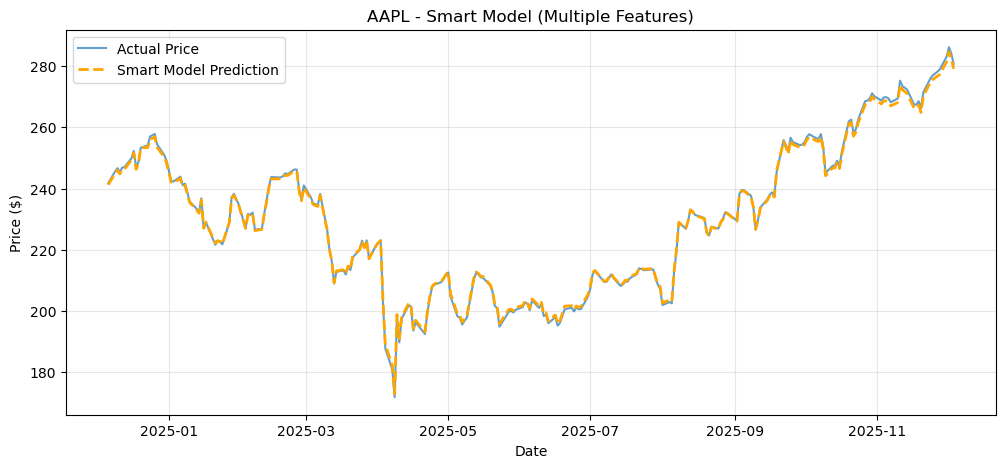

In [34]:
# Visualize smart model predictions
smart_predictions = smart_model.predict(X_smart)

plt.figure(figsize=(12, 5))
plt.plot(smart_df.index, smart_df['Close'], label='Actual Price', alpha=0.7)
plt.plot(smart_df.index, smart_predictions, label='Smart Model Prediction', 
         linestyle='--', linewidth=2, color='orange')
plt.title(f'{ticker} - Smart Model (Multiple Features)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


---
## Part 7: Why Is This So Hard?

You might notice our predictions aren't amazing. Here's why stock prediction is one of the hardest problems:

### The Efficient Market Hypothesis
If it were easy to predict stocks, everyone would do it, and the market would instantly adjust. The stock price already includes all known information!

### What We're Missing
- **News & Events** - Earnings reports, product launches, scandals
- **Market Sentiment** - What millions of investors are *feeling*
- **Economic Factors** - Interest rates, inflation, unemployment
- **Random Events** - Pandemics, wars, natural disasters

### A Humbling Exercise
Let's see how often our model even gets the *direction* right:


In [42]:
# Get predictions for test set
test_predictions = smart_model.predict(X_test_s)

# Calculate actual changes and predicted changes
actual_changes = y_test_s.values - X_test_s['Close'].values
predicted_changes = test_predictions - X_test_s['Close'].values

# Did we get the direction right? (both positive or both negative)
correct_direction = (actual_changes > 0) == (predicted_changes > 0)
accuracy = correct_direction.mean() * 100

print(f"Direction Accuracy: {accuracy:.1f}%")
print(f"\n(Random guessing would give ~50%)")


Direction Accuracy: 42.0%

(Random guessing would give ~50%)


---
## 🎯 Challenge: Build Your Own Stock Analyzer

Now it's your turn! Choose a stock and perform a complete analysis.

Requirements:
1. Download at least 1 year of data
2. Create a visualization with price and volume
3. Add moving averages
4. Build a prediction model
5. Make a prediction for the next day


In [36]:
# YOUR CODE HERE!
# Step 1: Choose your stock
my_stock = "___"  # Fill in a ticker symbol


In [37]:
# Step 2: Download the data


In [38]:
# Step 3: Explore with .head(), .describe()


In [39]:
# Step 4: Visualize (price + volume chart)


In [40]:
# Step 5: Add moving averages


In [41]:
# Step 6: Build a prediction model


In [ ]:
# Step 7: Make a prediction!


---
## 🎁 Bonus: Compare Multiple Stocks

Let's compare the "Magnificent 7" tech stocks!


In [ ]:
# Let's compare the "Magnificent 7" tech stocks
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'META', 'TSLA', 'NVDA']

plt.figure(figsize=(14, 6))

for t in tickers:
    temp_df = yf.download(t, period='1y', progress=False)
    temp_df.columns = temp_df.columns.get_level_values(0)
    data = temp_df['Close']
    normalized = (data / data.iloc[0]) * 100
    plt.plot(normalized, label=t)

plt.title('Magnificent 7 - Normalized Performance (1 Year)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Started at 100)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.show()


---
## 📚 Summary

Today we learned:

1. **`yfinance`** - Download real stock data with just one line of code
2. **Stock Data Structure** - Open, High, Low, Close, Volume
3. **Visualization** - Line charts, volume bars, combining multiple charts
4. **Moving Averages** - Smoothing out noisy data to see trends
5. **Prediction with Linear Regression** - Using ML to predict future prices
6. **Why It's Hard** - The market is complex and includes information we can't capture

### Key Takeaways
- Real-world data is messy and unpredictable
- Simple models can find general trends but miss day-to-day movements
- Machine learning is powerful, but not magic!

### What's Next?
If you want to go further:
- Try other models (Random Forest, Neural Networks)
- Add more features (news sentiment, technical indicators)
- Look into algorithmic trading (but be careful with real money! 💸)


---
*Disclaimer: This is for educational purposes only. Nothing here is financial advice. Never invest money you can't afford to lose!*
